# ***Taller 2 - Ontologias***

## ***Instalacion de dependencias***

In [2]:
!pip install rdflib
!pip install owlrl

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 565.1/565.1 kB 22.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.0/52.0 kB 4.2 MB/s eta 0:00:00


## ***Ejemplo estructura y sintaxis***

In [3]:
from re import S
from rdflib import Graph

# Creamos un grafografo
g = Graph()

# Leemos un grafo desde el internet
g.parse("http://www.w3.org/People/Berners-Lee/card")

# Vamos a recorrer el contenido en tripletas (subj, pred, obj)
for subj, pred, obj in g:
    # Check if there is at least one triple in the Graph
    print(subj, '-', pred, '-', obj)

# Imprimimos el grafo en formato RDF Turtle
print("\nGrafo serializado\n")
print(g.serialize(format="turtle"))

https://www.w3.org/People/Berners-Lee/card#i - http://www.w3.org/2000/10/swap/pim/contact#publicHomePage - https://www.w3.org/People/Berners-Lee/
https://timbl.com/timbl/Public/friends.ttl - http://xmlns.com/foaf/0.1/primaryTopic - https://www.w3.org/People/Berners-Lee/card#i
http://dig.csail.mit.edu/data#DIG - http://xmlns.com/foaf/0.1/member - https://www.w3.org/People/Berners-Lee/card#i
http://wiki.ontoworld.org/index.php/_IRW2006 - http://www.w3.org/2000/10/swap/pim/contact#participant - https://www.w3.org/People/Berners-Lee/card#i
http://www.w3.org/2011/Talks/0331-hyderabad-tbl/data#talk - http://purl.org/dc/terms/title - Designing the Web for an Open Society
https://timbl.com/timbl/Public/friends.ttl - http://creativecommons.org/ns#license - http://creativecommons.org/licenses/by-nc/3.0/
https://www.w3.org/People/Berners-Lee/card#i - http://www.w3.org/2006/vcard/ns#hasAddress - n50f0a49a834743aea31f243614c77f31b5
https://www.w3.org/People/Berners-Lee/card#i - http://www.w3.org/20

## ***Ejercicios***

### ***Ejercicio 1***

En formato turtle represente la siguiente tabla asociada al recurso 1984, complete con la solución en la variable `libro`

| ISBN         | Titulo               | Autor            | Paginas | Edición  | Editorial        | Año publicación | Idioma  |
|--------------|----------------------|------------------|---------|----------|------------------|-----------------|---------|
| 9780143127741 | 1984                 | George Orwell    | 328     | Primera | Penguin Books    | 2013            | Ingles  |

In [4]:
libro = """

@prefix book: <http://example.org/book/> .

book:1984
    book:ISBN "9780143127741" ;
    book:titulo "1984" ;
    book:autor "George Orwell" ;
    book:paginas "328" ;
    book:edicion "Primera" ;
    book:editorial "Penguin Books" ;
    book:anioPublicacion "2013" ;
    book:idioma "Ingles" .

"""


**Nota: Valide la sintaxis, generando una imagen del grafo de la ontologia usando la herramienta de [RDF Grapher](https://www.ldf.fi/service/rdf-grapher)**

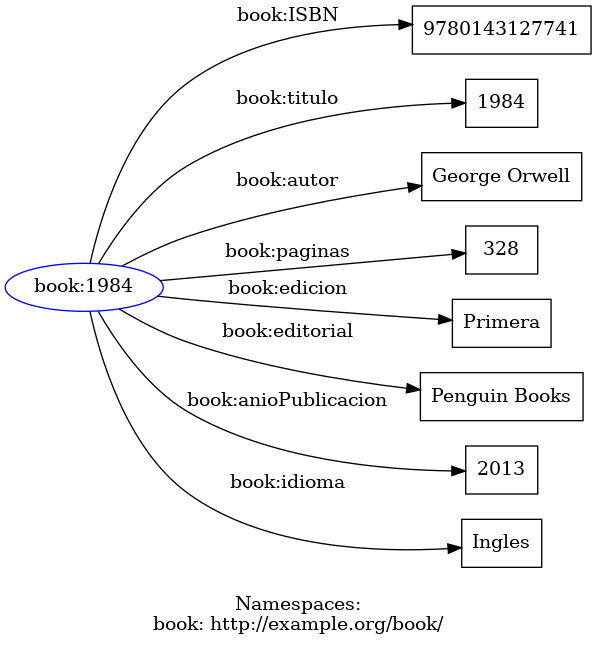

### ***Ejercicio 2***

**Con ayuda de RDFLib construya una ontologia basica junto a sus propiedades usando los datos disponibles de un libro**

| ISBN         | Titulo | Autor          | Paginas | Edición | Editorial     | Año publicación | Idioma |
|--------------|--------|----------------|---------|---------|---------------|-----------------|--------|
| 1613820917   | Hamlet | W. Shakespeare | 330     | N.D     | Simon and Brown | 2011            | Ingles |


In [28]:
from rdflib import Graph, Namespace, Literal

# Graph     → es la estructura donde se guardan las tripletas (como una base de datos de hechos).
# Namespace → es un “espacio de nombres”, básicamente una URL base para que todas las propiedades y recursos tengan direcciones únicas.
# Literal   → es un valor concreto: cadenas, números, fechas.
# RDF, XSD  → son vocabularios estándar:
# RDF.type  → indica la clase (ejemplo: "esto es un Libro").
# XSD       → tipos de datos (integer, string, gYear, etc.).

# Creamos un grafografo
g = Graph()

# Definimos un namespace para nuestros libros
BOOK = Namespace("http://example.org/book/")
g.bind("book", BOOK)

hamlet = BOOK["Hamlet"]
g.add((hamlet, BOOK.ISBN, Literal("1613820917")))
g.add((hamlet, BOOK.titulo, Literal("Hamlet")))
g.add((hamlet, BOOK.autor, Literal("W. Shakespeare")))
g.add((hamlet, BOOK.paginas, Literal("330")))
g.add((hamlet, BOOK.edicion, Literal("N.D")))
g.add((hamlet, BOOK.editorial, Literal("Simon and Brown")))
g.add((hamlet, BOOK.anioPublicacion, Literal("2011")))
g.add((hamlet, BOOK.idioma, Literal("Ingles")))

# Mostrar tripletas
for subj, pred, obj in g:
    print(subj, "-", pred, "-", obj)

# Serializar a Turtle
print("\nGrafo serializado:\n")
print(g.serialize(format="turtle"))

http://example.org/book/Hamlet - http://example.org/book/titulo - Hamlet
http://example.org/book/Hamlet - http://example.org/book/edicion - N.D
http://example.org/book/Hamlet - http://example.org/book/autor - W. Shakespeare
http://example.org/book/Hamlet - http://example.org/book/editorial - Simon and Brown
http://example.org/book/Hamlet - http://example.org/book/paginas - 330
http://example.org/book/Hamlet - http://example.org/book/anioPublicacion - 2011
http://example.org/book/Hamlet - http://example.org/book/idioma - Ingles
http://example.org/book/Hamlet - http://example.org/book/ISBN - 1613820917

Grafo serializado:

@prefix book: <http://example.org/book/> .

book:Hamlet book:ISBN "1613820917" ;
    book:anioPublicacion "2011" ;
    book:autor "W. Shakespeare" ;
    book:edicion "N.D" ;
    book:editorial "Simon and Brown" ;
    book:idioma "Ingles" ;
    book:paginas "330" ;
    book:titulo "Hamlet" .




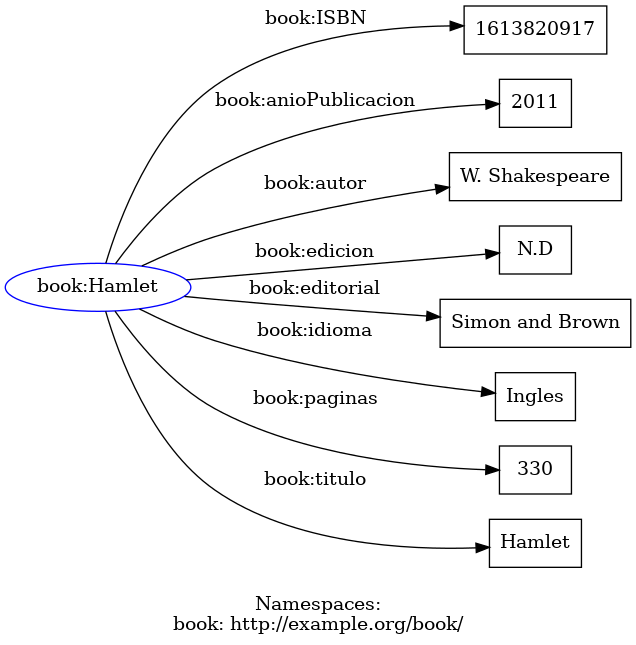

### ***Ejercicio 3***

**Usando RDFlib y nodos blancos represente la siguiente ontología**

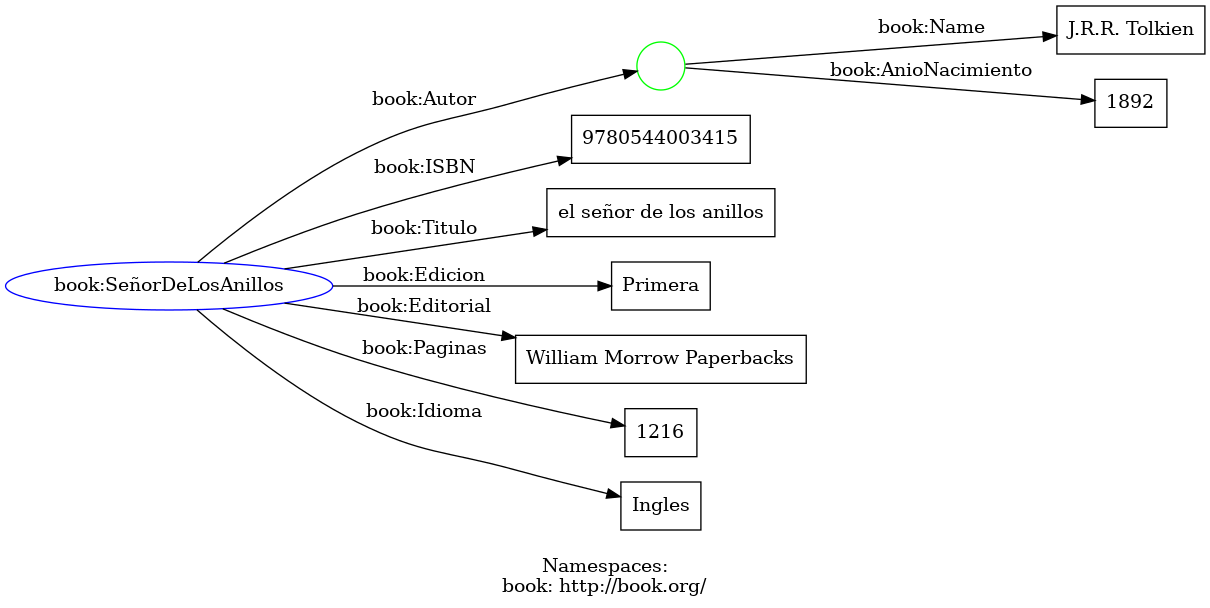

In [35]:
from rdflib import Graph, Namespace, Literal, BNode

# Crear grafo
g = Graph()

# Namespace
BOOK = Namespace("http://book.org/")
g.bind("book", BOOK)

# Recurso principal: El Señor de los Anillos
sdla = BOOK["SeñorDeLosAnillos"]

# Nodo en blanco para el autor
autor = BNode()

# Relacionar libro con el autor
g.add((sdla, BOOK.Autor, autor))

# Propiedades del autor (usando el nodo en blanco)
g.add((autor, BOOK.Name, Literal("J.R.R. Tolkien")))
g.add((autor, BOOK.AnioNacimiento, Literal("1892")))


# Otras propiedades del libro
g.add((sdla, BOOK.ISBN, Literal("9780544003415")))
g.add((sdla, BOOK.Titulo, Literal("El señor de los anillos")))
g.add((sdla, BOOK.Edicion, Literal("Primera")))
g.add((sdla, BOOK.Editorial, Literal("William Morrow Paperbacks")))
g.add((sdla, BOOK.Paginas, Literal("1216")))
g.add((sdla, BOOK.Idioma, Literal("Ingles")))

# Serializar
print(g.serialize(format="turtle"))


@prefix book: <http://book.org/> .

book:SeñorDeLosAnillos book:Autor [ book:AnioNacimiento "1892" ;
            book:Name "J.R.R. Tolkien" ] ;
    book:Edicion "Primera" ;
    book:Editorial "William Morrow Paperbacks" ;
    book:ISBN "9780544003415" ;
    book:Idioma "Ingles" ;
    book:Paginas "1216" ;
    book:Titulo "El señor de los anillos" .




### ***Ejercicio 4***

**Usando RDFlib y el concepto de contenedor represente que un evento tiene una
lista de invitados y una fecha, la cual está descrita por un día (lunes, martes,
miércoles, etc.) y un mes (ambos se deben escoger de una lista).
Use el grafico como guía**
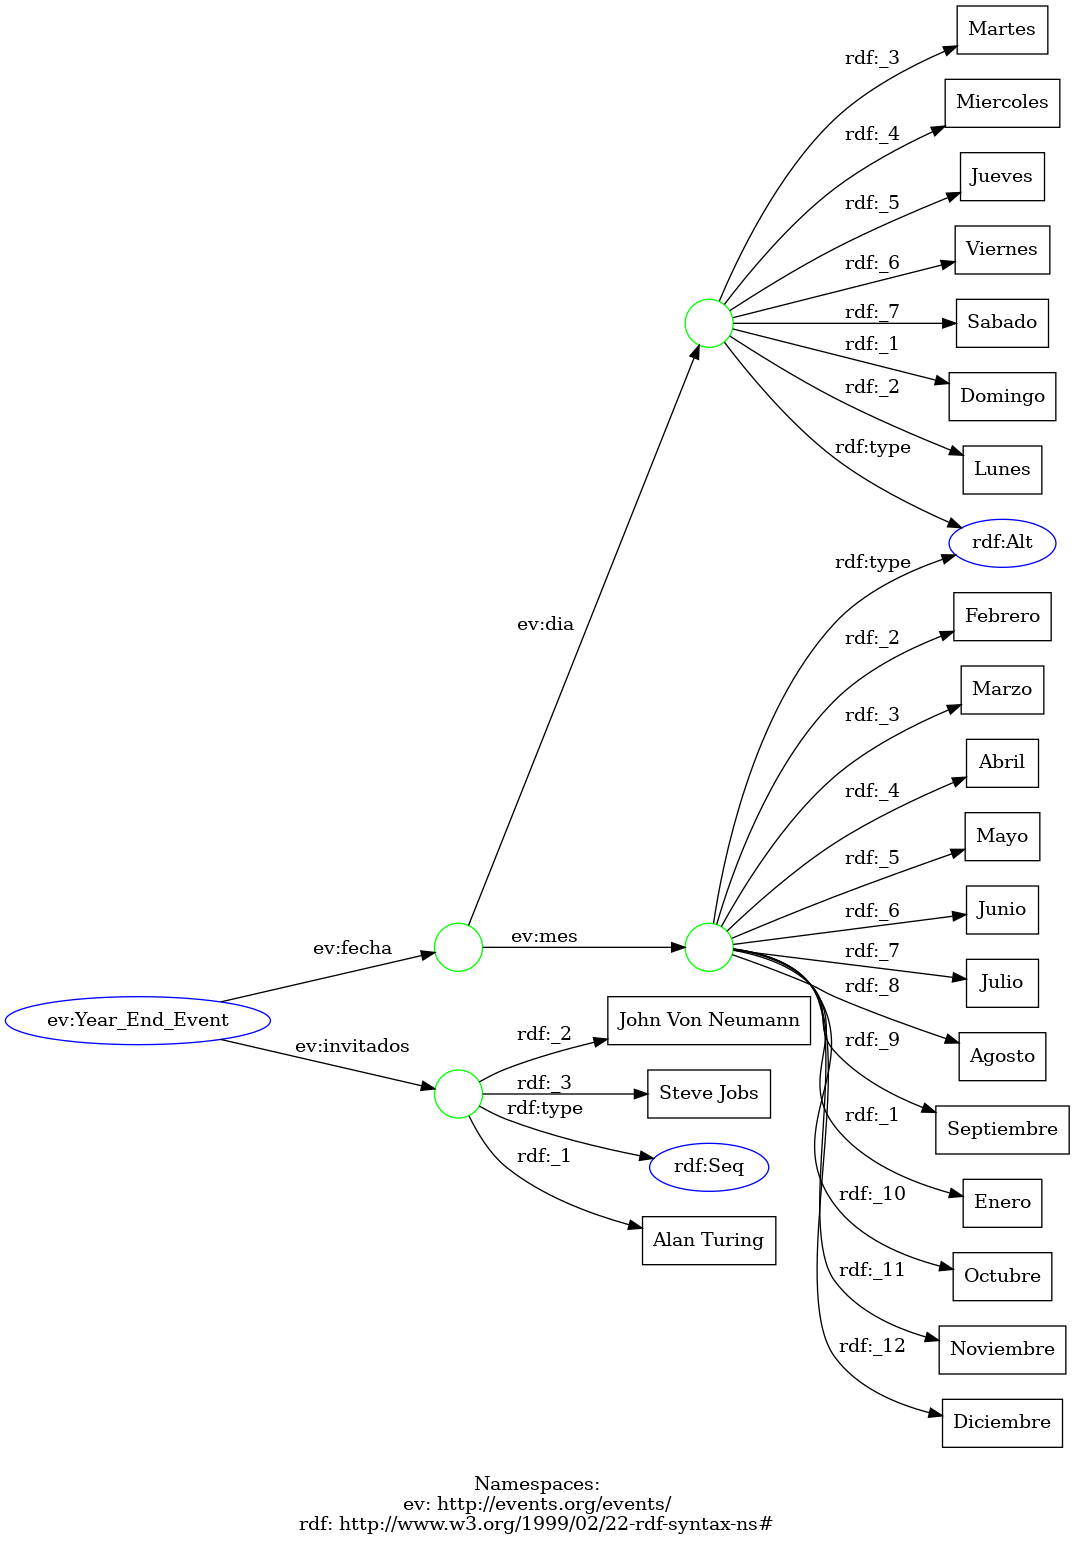


In [27]:
from rdflib import Graph, Namespace, Literal, BNode
from rdflib.namespace import RDF

# Crear grafo
g = Graph()

# Namespace
EV = Namespace("http://events.org/events/")
g.bind("ev", EV)

# Recurso principal: Year_End_Event
yee = EV["Year_End_Event"]

# Nodo en blanco para invitados y fecha
invitados = BNode()
fecha = BNode()

g.add((yee, EV.invitados, invitados))
g.add((yee, EV.fecha, fecha))

# Propiedades de las fechas (usando el nodo en blanco)
dia = BNode()
mes = BNode()

g.add((fecha, EV.dia, dia))
g.add((fecha, EV.mes, mes))


#RDF para dia
g.add((dia, RDF.type, RDF.Alt))  #rdf:Alt → alternativas (uno u otro).

# Propiedades de fecha -> dia ->
g.add((dia, RDF["_3"], Literal("Martes")))
g.add((dia, RDF["_4"], Literal("Miercoles")))
g.add((dia, RDF["_5"], Literal("Jueves")))
g.add((dia, RDF["_6"], Literal("Viernes")))
g.add((dia, RDF["_7"], Literal("Sabado")))
g.add((dia, RDF["_1"], Literal("Domingo")))
g.add((dia, RDF["_2"], Literal("Lunes")))


#RDF para mes
g.add((mes, RDF.type, RDF.Alt))  #rdf:Alt → alternativas (uno u otro).

# Propiedades de fecha -> mes ->
g.add((mes, RDF["_2"], Literal("Febreo")))
g.add((mes, RDF["_3"], Literal("Marzo")))
g.add((mes, RDF["_4"], Literal("Abril")))
g.add((mes, RDF["_5"], Literal("Mayo")))
g.add((mes, RDF["_6"], Literal("Junio")))
g.add((mes, RDF["_7"], Literal("Julio")))
g.add((mes, RDF["_8"], Literal("Agosto")))
g.add((mes, RDF["_9"], Literal("Septiembre")))
g.add((mes, RDF["_1"], Literal("Enero")))
g.add((mes, RDF["_10"], Literal("Octubre")))
g.add((mes, RDF["_11"], Literal("Noviembre")))
g.add((mes, RDF["_12"], Literal("Diciembre")))


#RDF para invitados
g.add((invitados, RDF.type, RDF.Seq))  #rdf:Seq → colección ordenada (secuencia).

# Propiedades de invitados ->
g.add((invitados, RDF["_2"], Literal("John Von Neumann")))
g.add((invitados, RDF["_3"], Literal("Steve Jobs")))
g.add((invitados, RDF["_1"], Literal("Alan Turing")))

# Serializar
print(g.serialize(format="turtle"))


@prefix ev: <http://events.org/events/> .
@prefix rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#> .

ev:Year_End_Event ev:fecha [ ev:dia [ a rdf:Alt ;
                    rdf:_1 "Domingo" ;
                    rdf:_2 "Lunes" ;
                    rdf:_3 "Martes" ;
                    rdf:_4 "Miercoles" ;
                    rdf:_5 "Jueves" ;
                    rdf:_6 "Viernes" ;
                    rdf:_7 "Sabado" ] ;
            ev:mes [ a rdf:Alt ;
                    rdf:_1 "Enero" ;
                    rdf:_10 "Octubre" ;
                    rdf:_11 "Noviembre" ;
                    rdf:_12 "Diciembre" ;
                    rdf:_2 "Febreo" ;
                    rdf:_3 "Marzo" ;
                    rdf:_4 "Abril" ;
                    rdf:_5 "Mayo" ;
                    rdf:_6 "Junio" ;
                    rdf:_7 "Julio" ;
                    rdf:_8 "Agosto" ;
                    rdf:_9 "Septiembre" ] ] ;
    ev:invitados [ a rdf:Seq ;
            rdf:_1 "Alan Turing" ;
        

### ***Ejercicio 5***

**Retome el ejercicio 4 y represente que el evento adicionalmente tiene
los siguientes empleados representados como colecciones: meseros y ayudantes.
Agregue 2 meseros y 2 ayudantes.
Use el grafico como guía**
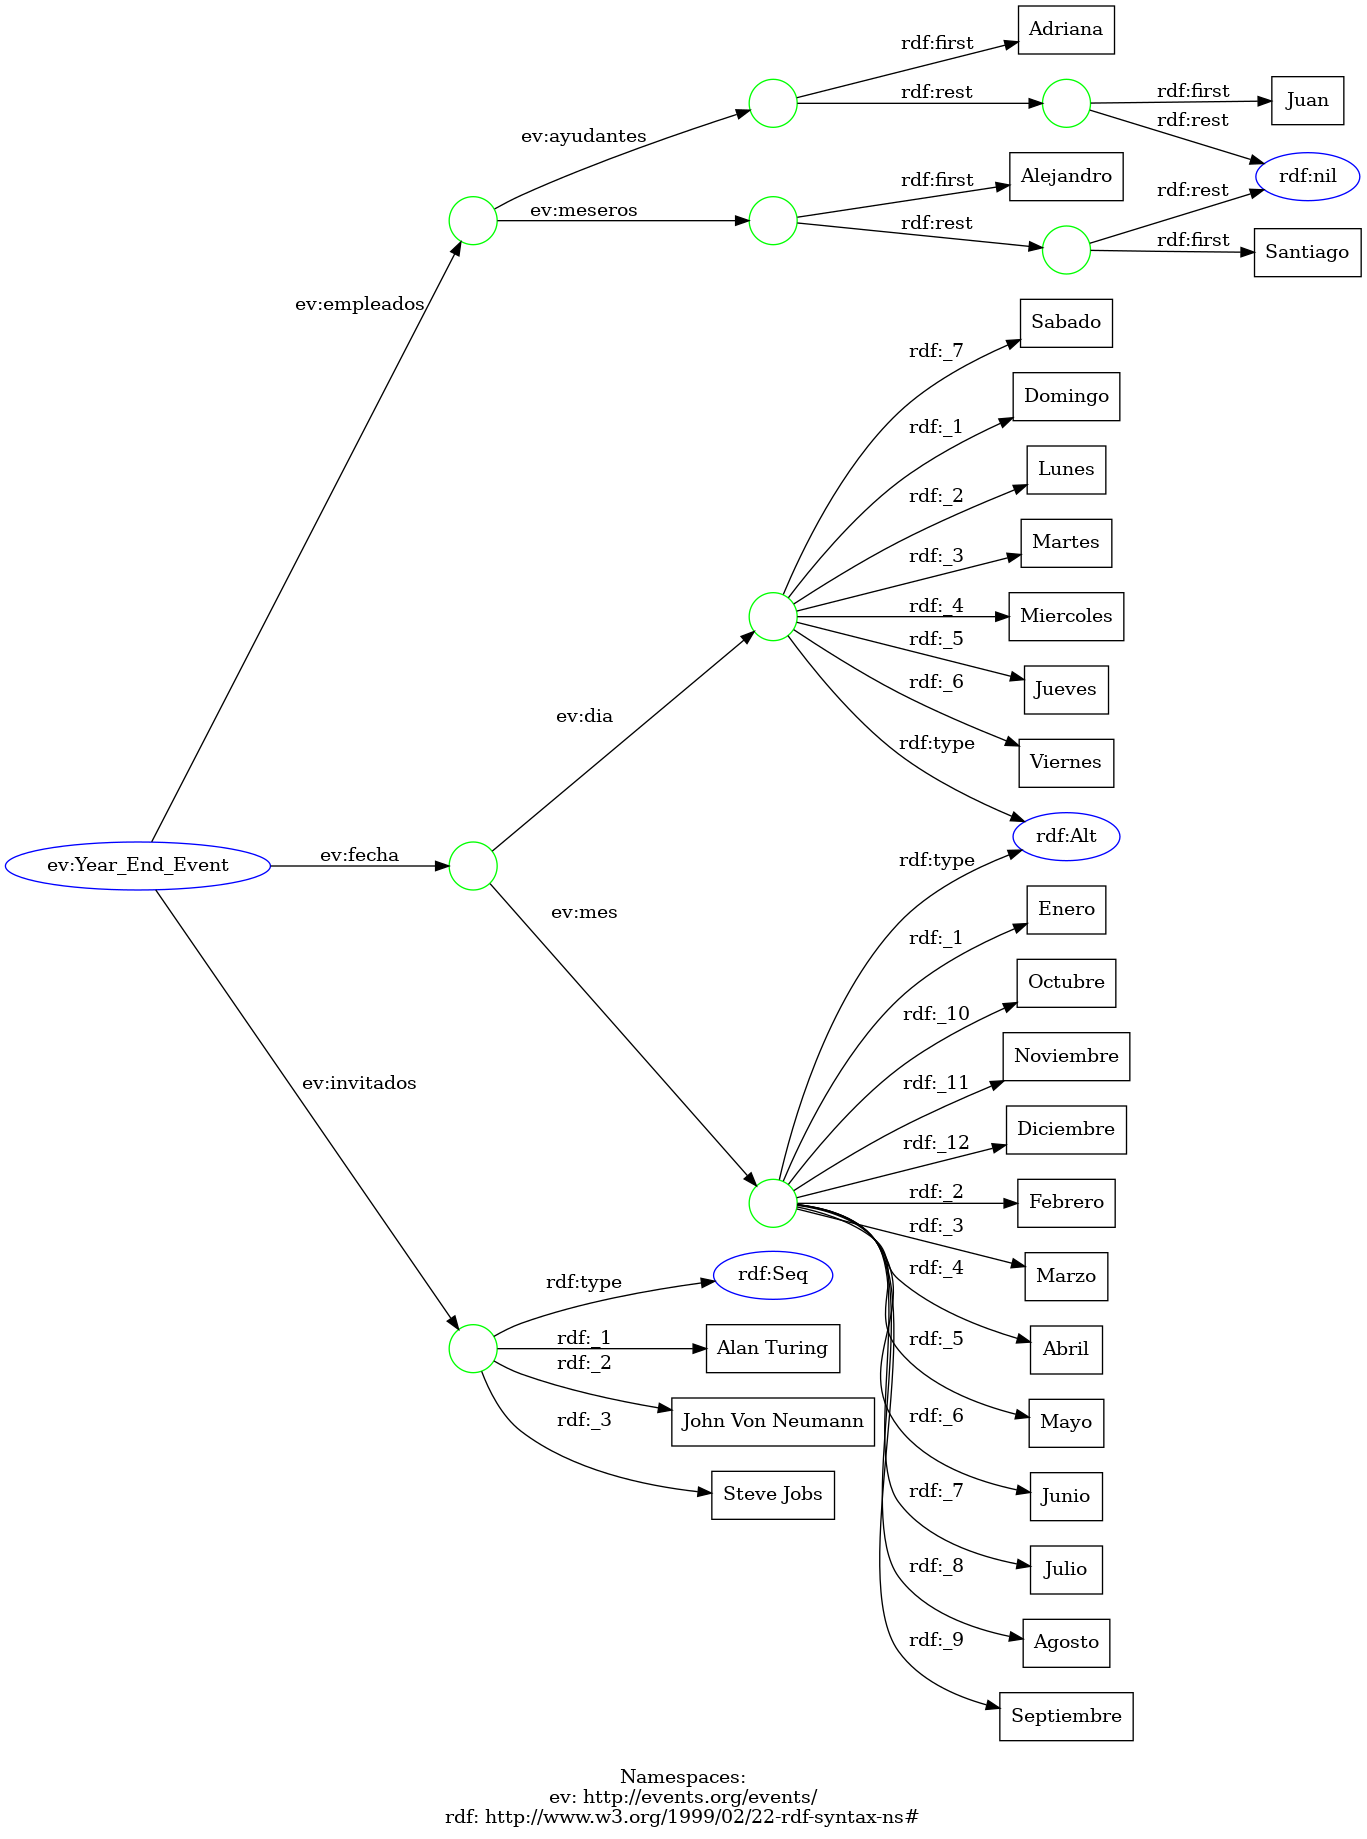

In [34]:
from rdflib import Graph, Namespace, Literal, BNode
from rdflib.namespace import RDF

# Crear grafo
g = Graph()

# Namespace
EV = Namespace("http://events.org/events/")
g.bind("ev", EV)

# Recurso principal: Year_End_Event
yee = EV["Year_End_Event"]

# Nodo en blanco para invitados y fecha
invitados = BNode()
fecha = BNode()

g.add((yee, EV.invitados, invitados))
g.add((yee, EV.fecha, fecha))

# Propiedades de las fechas (usando el nodo en blanco)
dia = BNode()
mes = BNode()

g.add((fecha, EV.dia, dia))
g.add((fecha, EV.mes, mes))


#RDF para dia
g.add((dia, RDF.type, RDF.Alt))  #rdf:Alt → alternativas (uno u otro).

# Propiedades de fecha -> dia ->
g.add((dia, RDF["_3"], Literal("Martes")))
g.add((dia, RDF["_4"], Literal("Miercoles")))
g.add((dia, RDF["_5"], Literal("Jueves")))
g.add((dia, RDF["_6"], Literal("Viernes")))
g.add((dia, RDF["_7"], Literal("Sabado")))
g.add((dia, RDF["_1"], Literal("Domingo")))
g.add((dia, RDF["_2"], Literal("Lunes")))


#RDF para mes
g.add((mes, RDF.type, RDF.Alt))  #rdf:Alt → alternativas (uno u otro).

# Propiedades de fecha -> mes ->
g.add((mes, RDF["_2"], Literal("Febreo")))
g.add((mes, RDF["_3"], Literal("Marzo")))
g.add((mes, RDF["_4"], Literal("Abril")))
g.add((mes, RDF["_5"], Literal("Mayo")))
g.add((mes, RDF["_6"], Literal("Junio")))
g.add((mes, RDF["_7"], Literal("Julio")))
g.add((mes, RDF["_8"], Literal("Agosto")))
g.add((mes, RDF["_9"], Literal("Septiembre")))
g.add((mes, RDF["_1"], Literal("Enero")))
g.add((mes, RDF["_10"], Literal("Octubre")))
g.add((mes, RDF["_11"], Literal("Noviembre")))
g.add((mes, RDF["_12"], Literal("Diciembre")))


#RDF para invitados
g.add((invitados, RDF.type, RDF.Seq))  #rdf:Seq → colección ordenada (secuencia).

# Propiedades de invitados ->
g.add((invitados, RDF["_2"], Literal("John Von Neumann")))
g.add((invitados, RDF["_3"], Literal("Steve Jobs")))
g.add((invitados, RDF["_1"], Literal("Alan Turing")))

#
# Punto 5. Mismo grafo que el anterior, todo lo de atras jja
#

# Nodo blanco empleados
empleados = BNode()
g.add((yee, EV.empleados, empleados))

# Propiedades de los ayudantes y meseros (usando el nodo en blanco)
ayudantes = BNode()
nodo1 = BNode()
meseros = BNode()
nodo2 = BNode()

# Ayudantes
g.add((empleados, EV.ayudantes, ayudantes))
g.add((ayudantes, RDF.first, Literal("Adriana")))
g.add((ayudantes, RDF.rest, nodo1))
g.add((nodo1, RDF.first, Literal("Juan")))
g.add((nodo1, RDF.rest, RDF.nil))

# Meseros
g.add((empleados, EV.meseros, meseros))
g.add((meseros, RDF.first, Literal("Alejandro")))
g.add((meseros, RDF.rest, nodo2))
g.add((nodo2, RDF.first, Literal("Santiago")))
g.add((nodo2, RDF.rest, RDF.nil))

# Serializar
print(g.serialize(format="turtle"))


@prefix ev: <http://events.org/events/> .
@prefix rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#> .

ev:Year_End_Event ev:empleados [ ev:ayudantes ( "Adriana" "Juan" ) ;
            ev:meseros ( "Alejandro" "Santiago" ) ] ;
    ev:fecha [ ev:dia [ a rdf:Alt ;
                    rdf:_1 "Domingo" ;
                    rdf:_2 "Lunes" ;
                    rdf:_3 "Martes" ;
                    rdf:_4 "Miercoles" ;
                    rdf:_5 "Jueves" ;
                    rdf:_6 "Viernes" ;
                    rdf:_7 "Sabado" ] ;
            ev:mes [ a rdf:Alt ;
                    rdf:_1 "Enero" ;
                    rdf:_10 "Octubre" ;
                    rdf:_11 "Noviembre" ;
                    rdf:_12 "Diciembre" ;
                    rdf:_2 "Febreo" ;
                    rdf:_3 "Marzo" ;
                    rdf:_4 "Abril" ;
                    rdf:_5 "Mayo" ;
                    rdf:_6 "Junio" ;
                    rdf:_7 "Julio" ;
                    rdf:_8 "Agosto" ;
           

### ***Ejercicio 6***

<div align="justify">

**Construir la siguientes estructura de herencia usando RDF y RDFS**

**Cree una ontologia que contenga las clases Persona, Actor,
Personaje y Película. En donde Personaje desciende de Actor el cual a su vez desciende de Persona.**

**Agregue tambien los siguientes...
Representar que una película "tiene" personajes y que además un actor "interpreta" personajes. Represente que una persona tiene "anioNacimiento", esta a su vez desciende de la propiedad "anio" y este tiene un "rango de tipo números", añada otra propiedad que describa que una Persona, tiene "amigos" que también son de tipo Persona. También describa que Persona y Película tiene "nombre", y el valor esperado "es un string".**

</div>

In [38]:
# domain = desde qué clase se usa la propiedad.
# range = hacia qué clase apunta la propiedad.

from rdflib import Graph, Namespace, RDF, RDFS, XSD

# Crear grafo
g = Graph()

# Namespace
EX = Namespace("http://example.org/")
g.bind("ex", EX)

# 1. Definir Clases
g.add((EX.Persona, RDF.type, RDFS.Class))
g.add((EX.Actor, RDF.type, RDFS.Class))
g.add((EX.Personaje, RDF.type, RDFS.Class))
g.add((EX.Pelicula, RDF.type, RDFS.Class))

# Jerarquía
g.add((EX.Actor, RDFS.subClassOf, EX.Persona))
g.add((EX.Personaje, RDFS.subClassOf, EX.Actor))

# 2. Propiedades de relación
# Pelicula tiene personajes
g.add((EX.tienePersonaje, RDF.type, RDF.Property))
g.add((EX.tienePersonaje, RDFS.domain, EX.Pelicula))
g.add((EX.tienePersonaje, RDFS.range, EX.Personaje))

# Actor interpreta personaje
g.add((EX.interpreta, RDF.type, RDF.Property))
g.add((EX.interpreta, RDFS.domain, EX.Actor))
g.add((EX.interpreta, RDFS.range, EX.Personaje))

# 3. Propiedades de datos
# Propiedad general "anio"
g.add((EX.anio, RDF.type, RDF.Property))
g.add((EX.anio, RDFS.range, RDFS.Literal))

# Subpropiedad "anioNacimiento"
g.add((EX.anioNacimiento, RDF.type, RDF.Property))
g.add((EX.anioNacimiento, RDFS.subPropertyOf, EX.anio))
g.add((EX.anioNacimiento, RDFS.domain, EX.Persona))
g.add((EX.anioNacimiento, RDFS.range, XSD.integer))

# Persona tiene amigos (también de tipo Persona)
g.add((EX.amigo, RDF.type, RDF.Property))
g.add((EX.amigo, RDFS.domain, EX.Persona))
g.add((EX.amigo, RDFS.range, EX.Persona))

# Persona y Película tienen nombre
g.add((EX.nombre, RDF.type, RDF.Property))
g.add((EX.nombre, RDFS.domain, EX.Persona))
g.add((EX.nombre, RDFS.domain, EX.Pelicula))
g.add((EX.nombre, RDFS.range, XSD.string))

# Serializar el grafo
print(g.serialize(format="turtle"))


@prefix ex: <http://example.org/> .
@prefix rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#> .
@prefix rdfs: <http://www.w3.org/2000/01/rdf-schema#> .
@prefix xsd: <http://www.w3.org/2001/XMLSchema#> .

ex:Actor a rdfs:Class ;
    rdfs:subClassOf ex:Persona .

ex:Pelicula a rdfs:Class .

ex:Persona a rdfs:Class .

ex:Personaje a rdfs:Class ;
    rdfs:subClassOf ex:Actor .

ex:amigo a rdf:Property ;
    rdfs:domain ex:Persona ;
    rdfs:range ex:Persona .

ex:anioNacimiento a rdf:Property ;
    rdfs:domain ex:Persona ;
    rdfs:range xsd:integer ;
    rdfs:subPropertyOf ex:anio .

ex:interpreta a rdf:Property ;
    rdfs:domain ex:Actor ;
    rdfs:range ex:Personaje .

ex:nombre a rdf:Property ;
    rdfs:domain ex:Pelicula,
        ex:Persona ;
    rdfs:range xsd:string .

ex:tienePersonaje a rdf:Property ;
    rdfs:domain ex:Pelicula ;
    rdfs:range ex:Personaje .

ex:anio a rdf:Property ;
    rdfs:range rdfs:Literal .




### ***Ejercicio 7***

**Cargue el archivo `libros.ttl` y realice programaticamente las siguientes consultas:**

- **Realice una consulta para obtener los nombres de autores en la ontologia**

- **Realice una consulta para obtener los nombres de libros en la ontologia**

- **Realice una consulta para encontrar el nombre del autor del quijote**

In [41]:
from rdflib import Graph, Namespace

# Crear grafo
g = Graph()

# Cargar el archivo libros.ttl
g.parse("libros.ttl", format="turtle")

# Namespace correcto según el TTL
EX = Namespace("http://www.books.org/")


# 1. Obtener nombres de autores
q1 = """
PREFIX ex: <http://www.books.org/>

SELECT ?nombre
WHERE {
    ?autor a ex:Autor .
    ?autor ex:tieneNombre ?nombre .
}
"""

print("Autores:")
for row in g.query(q1):
    print(row.nombre)


# 2. Obtener nombres de libros
q2 = """
PREFIX ex: <http://www.books.org/>

SELECT ?titulo
WHERE {
    ?libro a ex:Libro .
    ?libro ex:titulo ?titulo .
}
"""

print("\nLibros:")
for row in g.query(q2):
    print(row.titulo)


# 3. Autor del Quijote
q3 = """
PREFIX ex: <http://www.books.org/>

SELECT ?nombre
WHERE {
    ?libro a ex:Libro ;
           ex:titulo "Don Quijote de la Mancha" .
    ?autor ex:esAutorDe ?libro ;
           ex:tieneNombre ?nombre .
}
"""

print("\nAutor de El Quijote:")
for row in g.query(q3):
    print(row.nombre)


Autores:
Juan Pérez
María López
Gabriel García Márquez
Jorge Luis Borges

Libros:
Don Quijote de la Mancha
La Sombra del Viento
Cien Años de Soledad
Ficciones

Autor de El Quijote:
Juan Pérez


### ***Ejercicio 8***

Ejecute el codigo y responda:

- ¿Qué tripletas nuevas se generaron?

In [45]:
from rdflib import Graph, RDF, RDFS, OWL, Namespace
import owlrl

g = Graph()

n = Namespace("http://example.org/")

# Añadir clases y relaciones
g.add((n.John, RDF.type, n.Human))
g.add((n.Human, RDF.type, RDFS.Class))
g.add((n.Mammal, RDF.type, RDFS.Class))
g.add((n.Human, RDFS.subClassOf, n.Mammal))

# Definir una propiedad con dominio y rango
g.add((n.hasChild, RDF.type, RDF.Property))
g.add((n.hasChild, RDFS.domain, n.Human))
g.add((n.hasChild, RDFS.range, n.Human))

g.add((n.hasSibling, RDF.type, RDF.Property))
g.add((n.hasSibling, RDFS.domain, n.Human))
g.add((n.hasSibling, RDFS.range, n.Human))
g.add((n.hasSibling, RDFS.subPropertyOf, n.hasChild))

# Relacionar a John con su hijo Jane y con su hermano Mark
g.add((n.John, n.hasChild, n.Jane))
g.add((n.John, n.hasSibling, n.Mark))

## Aplicar razonamiento
owlrl.DeductiveClosure(owlrl.RDFS_Semantics).expand(g)


print("Resultado:")

for subject, predicate, obj in g:
  if str(obj) != "http://www.w3.org/2000/01/rdf-schema#Resource":
    print(f"{subject} {predicate} {obj}")

# Guardar el grafo expandido en un archivo Turtle (Para el punto 9)
g.serialize("grafo_expandido.ttl", format="turtle")
print("\n Grafo expandido guardado en grafo_expandido.ttl siuuu!")


Resultado:
http://example.org/hasChild http://www.w3.org/2000/01/rdf-schema#domain http://example.org/Human
http://example.org/Human http://www.w3.org/1999/02/22-rdf-syntax-ns#type http://www.w3.org/2000/01/rdf-schema#Class
http://www.w3.org/2000/01/rdf-schema#range http://www.w3.org/1999/02/22-rdf-syntax-ns#type http://www.w3.org/1999/02/22-rdf-syntax-ns#Property
http://example.org/John http://example.org/hasSibling http://example.org/Mark
http://example.org/John http://example.org/hasChild http://example.org/Mark
http://example.org/hasChild http://www.w3.org/2000/01/rdf-schema#range http://example.org/Human
http://example.org/Human http://www.w3.org/2000/01/rdf-schema#subClassOf http://example.org/Mammal
http://www.w3.org/2000/01/rdf-schema#subClassOf http://www.w3.org/1999/02/22-rdf-syntax-ns#type http://www.w3.org/1999/02/22-rdf-syntax-ns#Property
http://www.w3.org/2000/01/rdf-schema#range http://www.w3.org/2000/01/rdf-schema#subPropertyOf http://www.w3.org/2000/01/rdf-schema#range

**Las tripletas nuevas fueron:**
1. John rdf:type Mammal
2. Jane rdf:type Human
3. Jane rdf:type Mammal
4. Mark rdf:type Human
5. Mark rdf:type Mammal
6. John hasChild Mark

### ***Ejercicio 9***

**Teniendo en cuenta el resultado del grafo anterior, realice una consulta que obtenga todos los recursos que sean de tipo Mammal**

In [47]:
from rdflib import Graph, RDF, Namespace

# Namespace
n = Namespace("http://example.org/")

# Grafo cargado del ejercicio 8 (ya expandido con owlrl)
g = Graph()
g.parse("grafo_expandido.ttl", format="turtle")

# Consulta SPARQL
q = """
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX ex: <http://example.org/>

SELECT ?individuo
WHERE {
    ?individuo rdf:type ex:Mammal .
}
"""

res = g.query(q)

print("Individuos de tipo Mammal:")
for row in res:
    print(row.individuo)


Individuos de tipo Mammal:
http://example.org/John
http://example.org/Jane
http://example.org/Mark


### ***Ejercicio 10***

En una ontología académica se definen las siguientes relaciones:

- `Profesor` y `Estudiante` son subclases de `Persona`.  
- `CursoAvanzado` es una subclase de `Curso`.  
- La propiedad `enseñaCurso` tiene como **dominio `Profesor`** y **rango `Curso`**.  
- La propiedad `asisteCurso` tiene como **dominio `Estudiante`** y **rango `Curso`**.  
- Tanto `enseñaCurso` como `asisteCurso` son subpropiedades de `participaEnCurso`.

Se sabe que:

- `María` enseña el curso `CursoML`.  
- `Luis` asiste al curso `CursoML`.  
- `CursoML` es un `CursoAvanzado`.

---

### Instrucciones

Usando razonamiento RDFS, infiera todas las tripletas adicionales que pueden deducirse automáticamente del esquema y los datos proporcionados.

In [49]:
'''
@prefix ex: <http://example.org/> .

ex:Maria ex:participaEnCurso ex:CursoML ;
         a ex:Profesor, ex:Persona .

ex:Luis  ex:participaEnCurso ex:CursoML ;
         a ex:Estudiante, ex:Persona .

ex:CursoML a ex:Curso .
'''

'\n@prefix ex: <http://example.org/> .\n\nex:Maria ex:participaEnCurso ex:CursoML ;\n         a ex:Profesor, ex:Persona .\n\nex:Luis  ex:participaEnCurso ex:CursoML ;\n         a ex:Estudiante, ex:Persona .\n\nex:CursoML a ex:Curso .\n'